In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
dataset =pd.read_csv('../input/mnist_train.csv')
print(dataset.head(5))

   label  1x1  1x2  1x3  1x4  ...    28x24  28x25  28x26  28x27  28x28
0      5    0    0    0    0  ...        0      0      0      0      0
1      0    0    0    0    0  ...        0      0      0      0      0
2      4    0    0    0    0  ...        0      0      0      0      0
3      1    0    0    0    0  ...        0      0      0      0      0
4      9    0    0    0    0  ...        0      0      0      0      0

[5 rows x 785 columns]


In [3]:
# save the labels into a variable named l
l = dataset['label']
# drop the label feature and store the pixel data in d
d = dataset.drop('label', axis=1)

In [4]:
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


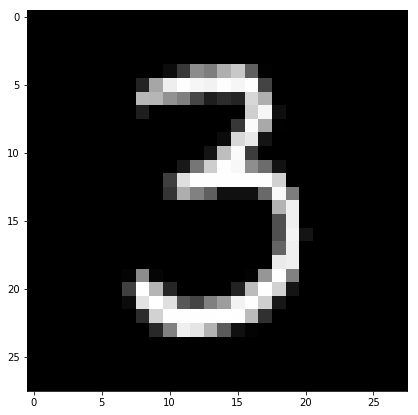

3


In [5]:
# display or plot a number
plt.figure(figsize=(7,7))
idx=50

# reshape from 1d to 2d pixel array
grid_data = d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

# print index value of the label
print(l[idx])

In [6]:
# 2D visualization using PCA
labels = l
data = d
print("The shape of sample data = ", data.shape)

The shape of sample data =  (60000, 784)


** Data Processing **

In [7]:
# Standardizing the data
# standardizing means calculating the Z score
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(60000, 784)


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
# find the covariance matrix which is : A^T * A
sample_data = standardized_data

#matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [9]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2-Dimensional Space
from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen values in ascending order
# this code generates only the top 2 (783 and 782) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782, 783))

print("Shape of eigen vectors = ", vectors.shape)

# converting the eigen vectors into 2d shape for easyness of further computation
vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [10]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector mulitplication
new_coordinates = np.matmul(vectors, sample_data.T)
print ("Resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

Resultanat new data points' shape  (2, 784) X (784, 60000)  =  (2, 60000)


In [11]:
# appending label to the 2nd projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for plotting the labeled points
dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal', 'label'))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.814790      -0.922159    5.0
1      -7.754403       8.708977    0.0
2       9.431338       2.328389    4.0
3      -3.746318      -6.582173    1.0
4       3.133297      -5.183251    9.0


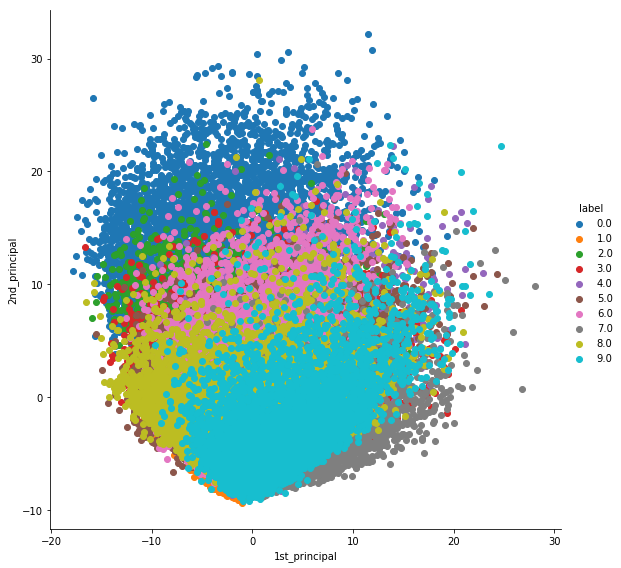

In [12]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=8).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

> ** PCA using Scikit-Learn**

In [13]:
from sklearn.decomposition import PCA
# initializing the pca
pca = PCA(n_components=2) # configuring the number of components
pca_data = pca.fit_transform(sample_data)

In [14]:
# pca_data will contain the 2d projects of simple data
print("Shape of pca_reduced.shape = ", pca_data.shape)

Shape of pca_reduced.shape =  (60000, 2)


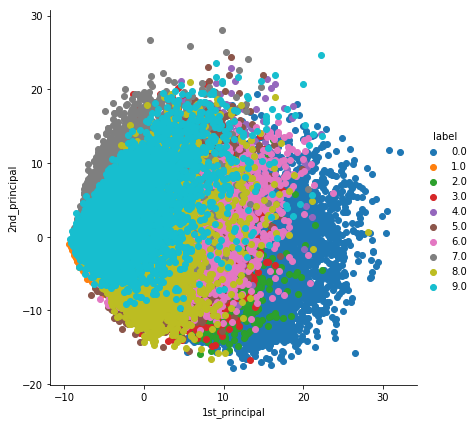

In [15]:
# attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data frame which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal', 'label'))
sn.FacetGrid(pca_df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()